# Aerosols scattering
==============================================================


- author : Sylvie Dagoret-Campagne
- date : May  18th 2017

In [24]:
import numpy as np
import pandas as pd

# Set up matplotlib and use a nicer set of plot parameters
#%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

#import matplotlib as mpl

In [25]:
from astropy import units as u

In [26]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Initialisation

## Functions

### Attenuation at different altitudes

\begin{eqnarray}
\beta_a(h_2,\lambda) & = & \beta_a(h_1,\lambda) \exp\left( \frac{-(h_2-h_1)}{H_p}\right)  
\end{eqnarray}

$0.95 km < H_P < 1.5 km$

\begin{eqnarray}
\beta_a(h,\lambda) & = & \frac{\tau_{VAOD}}{H_p\cdot \left[ 1 - \exp \left( -\frac{h_2-h_1}{H_P}\right)\right]} \approx \frac{\tau_{VAOD}}{H_p}
\end{eqnarray}



\begin{eqnarray}
\tau_{HAOD}(h,\lambda) & = & \beta(h,\lambda)\cdot L = \frac{L}{H_P} \tau_{VAOD}
\end{eqnarray}

## Aerosols models

La profondeur optique des aérosols $\tau_{AOD}$ peut être paramétrisée au plus simple par la formule:

$$
\tau_{AOD}  =  \tau_{aer}(\lambda_0) \left(\frac{\lambda_0}{\lambda}\right)^\alpha 
$$

In [33]:
def VAeroOptDepth(wavelength,tau_aerosols_550=0.10,alpha_ang=1.22) :
    """
    VAeroOptDepth(wavelength, alpha)

    Provide Vertical Aerosols optical depth
    - Input : wavelength : input wavelength in nm
    - Input : alpha : Angstrom exponent
    - Output : OptDepth  : output optical depth no unit for aerosols
    
    """

    OD=tau_aerosols_550*np.exp(-alpha_ang*np.log(wavelength/(550*u.nm)))
    return OD

In [34]:
wavelength=np.linspace(200.,1100.,100)*u.nm

In [35]:
VAOD=VAeroOptDepth(wavelength)

### VAOD
for quantiles 5% 10% 50% 90% 95%

In [36]:
VAOD_quantiles=np.array([0.03,0.0455,0.09,0.244,0.322]) # MERRA2

## Horizontal Aerosol Optical Depth

In [37]:
def HAeroOptDepth(wavelength,L,HP,tau_aerosols_550=0.10,alpha_ang=1.22) :
    """
    VAeroOptDepth(wavelength, alpha)

    Provide Vertical Aerosols optical depth
    - Input : wavelength : input wavelength in nm
    - Input : alpha : Angstrom exponent
    - Output : OptDepth  : output optical depth no unit for aerosols
    
    """    
    
    VAOD=((L/HP).decompose())*VAeroOptDepth(wavelength,tau_aerosols_550,alpha_ang)
        
    return VAOD

In [38]:
HAOD=HAeroOptDepth(wavelength,L=200.*u.m,HP=1.*u.km)

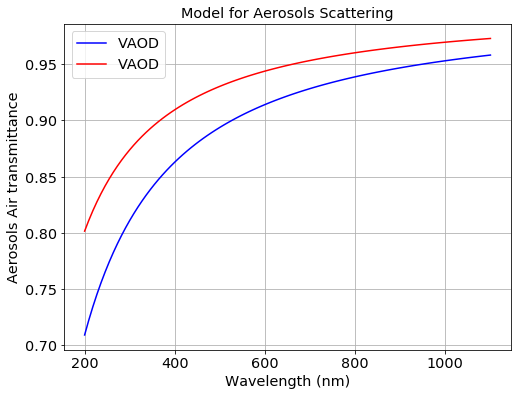

In [49]:
plt.plot(wavelength,np.exp(-VAOD),'b-',label='VAOD')
plt.plot(wavelength,np.exp(-HAOD.decompose()),'r-',label='VAOD')
plt.title('Model for Aerosols Scattering')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Aerosols Air transmittance')
plt.grid(True)
plt.legend()

In [44]:
N_VAOD=VAOD_quantiles.shape[0]

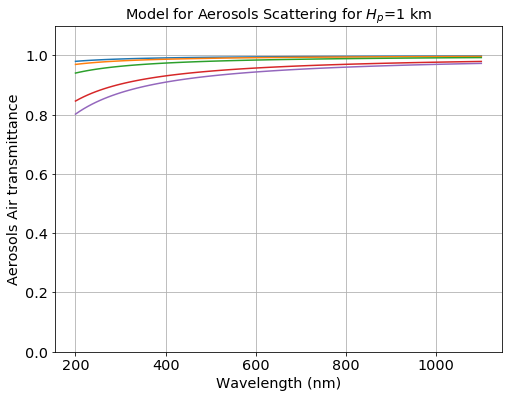

In [54]:
for i in np.arange(0,N_VAOD):
    HAOD=HAeroOptDepth(wavelength,L=200.*u.m,HP=1.0*u.km,tau_aerosols_550=VAOD_quantiles[i])
    plt.plot(wavelength,np.exp(-HAOD.decompose()))
plt.title('Model for Aerosols Scattering for $H_p$=1 km')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Aerosols Air transmittance')
plt.ylim(0,1.1)
plt.grid(True)
plt.legend()
    